## Simon Effect

Run model and compare simulation vs. emperical simon effects

In [8]:
import sys
import os


SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

from simon_device import *
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2, rc={'lines.linewidth':3})
sns.set_style('white')

In [9]:
# plt.rcParams.keys()

In [10]:
# Boksem data
df_bokesem1 = pd.DataFrame({'condition_stimulus':np.array(["congruent", "incongruent"]), 
                           'accuracy':1-np.array([0.075, 0.153]), 
                           'response_time':np.array([451,483])})
df_bokesem2 = pd.DataFrame({'condition_cue':np.array(["valid", "invalid"]), 
                           'accuracy':1-np.array([0.071, 0.157]), 
                           'response_time':np.array([446, 488])}) 

In [11]:
param_set={'valid_cue_percentage':0.8, 'n_trials':20, 'seed':'none'}

In [12]:
df_model, df_param= run_simulation(log='simon_effect_', n_simulation=10, param_set=param_set)

......>>> LOAD SIMULATION DATA <<<......


In [13]:
df_model['response_time'] = df_model['response_time'] * 1000

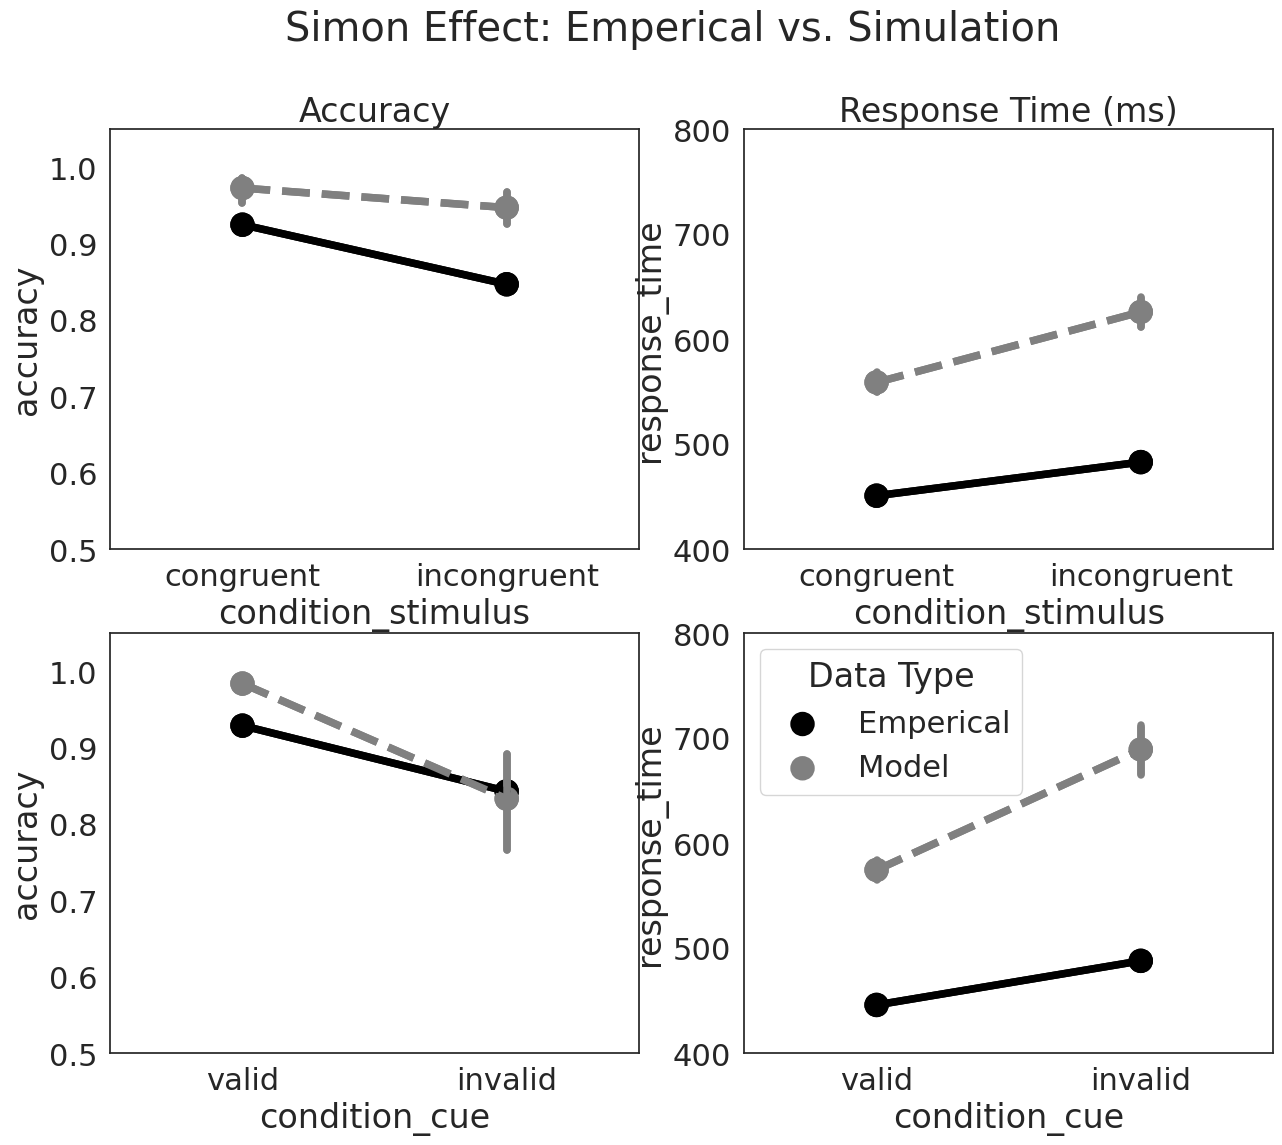

In [14]:
plt.rcParams["figure.figsize"] = [7.0, 3.50]

fig, axes = plt.subplots(2,2, figsize=(15, 12))
fig.suptitle('Simon Effect: Emperical vs. Simulation')

sns.pointplot(data=df_bokesem1, x='condition_stimulus', y='accuracy', order=['congruent', 'incongruent'], color='black', linestyles='-', join=True, ax=axes[0][0], label='Emperical')
sns.pointplot(data=df_model, x='condition_stimulus', y='accuracy', order=['congruent', 'incongruent'], color='gray', linestyles='--', ax=axes[0][0], label='Model')
sns.pointplot(data=df_bokesem1, x='condition_stimulus', y='accuracy', order=['congruent', 'incongruent'], color='black', linestyles='-', join=True, ax=axes[0][0])
sns.pointplot(data=df_model, x='condition_stimulus', y='accuracy', order=['congruent', 'incongruent'], color='gray', linestyles='--', ax=axes[0][0])

sns.pointplot(data=df_bokesem1, x='condition_stimulus', y='response_time', order=['congruent', 'incongruent'], color='black', linestyles='-', join=True, ax=axes[0][1])
sns.pointplot(data=df_model, x='condition_stimulus', y='response_time', order=['congruent', 'incongruent'], color='gray', linestyles='--', ax=axes[0][1])
sns.pointplot(data=df_bokesem1, x='condition_stimulus', y='response_time', order=['congruent', 'incongruent'], color='black', linestyles='-', join=True, ax=axes[0][1])
sns.pointplot(data=df_model, x='condition_stimulus', y='response_time', order=['congruent', 'incongruent'], color='gray', linestyles='--', ax=axes[0][1])


sns.pointplot(data=df_bokesem2, x='condition_cue', y='accuracy', order=['valid', 'invalid'], color='black', linestyles='-', join=True, ax=axes[1][0])
sns.pointplot(data=df_model, x='condition_cue', y='accuracy', order=['valid', 'invalid'], color='gray', linestyles='--', ax=axes[1][0])
sns.pointplot(data=df_bokesem2, x='condition_cue', y='accuracy', order=['valid', 'invalid'], color='black', linestyles='-', join=True, ax=axes[1][0])
sns.pointplot(data=df_model, x='condition_cue', y='accuracy', order=['valid', 'invalid'], color='gray', linestyles='--', ax=axes[1][0])

sns.pointplot(data=df_bokesem2, x='condition_cue', y='response_time', order=['valid', 'invalid'], color='black', linestyles='-', join=True, ax=axes[1][1], label='Emperical')
sns.pointplot(data=df_model, x='condition_cue', y='response_time', order=['valid', 'invalid'], color='gray', linestyles='--', ax=axes[1][1], label='Model')
sns.pointplot(data=df_bokesem2, x='condition_cue', y='response_time', order=['valid', 'invalid'], color='black', linestyles='-', join=True, ax=axes[1][1])
sns.pointplot(data=df_model, x='condition_cue', y='response_time', order=['valid', 'invalid'], color='gray', linestyles='--', ax=axes[1][1])


axes[0][0].set_ylim(0.5,1.05)
axes[1][0].set_ylim(0.5,1.05)
axes[0][1].set_ylim(400,800)
axes[1][1].set_ylim(400, 800)

axes[0][0].set_title('Accuracy')
axes[0][1].set_title('Response Time (ms)')
plt.legend(title='Data Type', loc='best')

plt.show()